# Code for the Project (required part)

# Question 1:

In [1]:
# 1.1: Load data (Successful)

# Import pandas to read data
import pandas as pd

# Read the data using pd.read_csv() with relative path, keep high precision
df=pd.read_csv("./input_data.csv", header=None, float_precision='round_trip')

# row is 2207, col is 459
print(df.shape) # returned (2207, 459)

(2207, 459)


In [2]:
# 1.2 Continue (data wrangling)

print(df.isna().values.sum()) # returned 0, meaning no missing data

# Handling constant rows
constant_df=df[df.nunique(axis=1)==1]
df.drop(constant_df.index, inplace=True)
print(df.shape) # return (1806, 459)


# Transpose it such that every row is the vector, with columns corresponding to entries in the vector.
std_df=df.T
print(std_df.shape) # returned (459, 1806), transpose is successful

# Perform range standardization through elementwise functions (y_ij): (reuse my own code for asignment 3)
# use for loop to, where i is the column, j is values at new_df[col]
# using skelearn.preprocessing.StandardScaler also works

# for col in std_df.columns:
#     std_df[col]=(std_df[col]-std_df[col].min())/(std_df[col].max()-std_df[col].min())

# print("The range standardized features y_ij are:\n")
# print(std_df)



0
(1806, 459)
(459, 1806)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

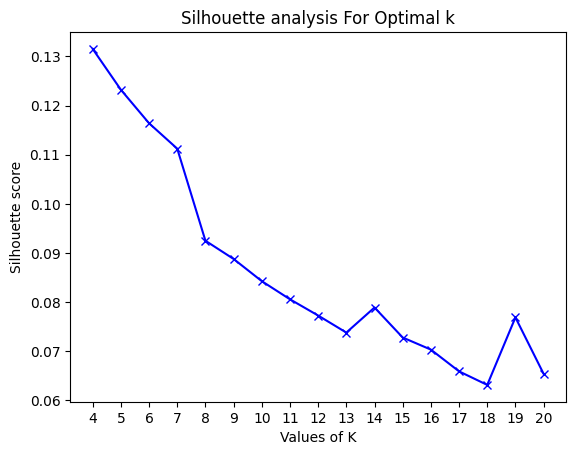

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



The score for 4-means clustering on regular data is:
-12615.042035764036

The inertria for 4-means clustering on regular data is:
12615.042035764036

The labels for 4-means clustering on regular data is:
[1 1 1 1 1 2 2 1 2 3 1 1 1 1 0 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 3 0 0 0 1 1 1 1 3 0 3 3 3 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 1 1 1 1 0 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 1 0 0 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 3
 0 0 0 0 1 1 0 2 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 2 2 3 0 3 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 2 1 1 2 1 0 1 1 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 3 3 3 3 3 0 0 0 1 0 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 0 1 1 1 1 1 1 1 3 1 1 0 1 1 1 0 0 2
 0 0 0 0 0 3 0 0 0 0 1 0 1 1 1 3 0 0 0 0 1 0 

In [4]:
# 1.3: Perform K-means Clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# EXTRA: determine how to do get the best # cluster using elbow and Silhoutette

# Finding optimal number of clusters
range_clusters=np.arange(4,21)

# use for loop to  run different K-means model with different numbers of cluster, find the inertia and silhouette coefficient
# Inertia is the sum of distances of samples to their cloeses cluster center
# Silhouette coefficient silhouette score: measures of how similar a data point is within cluster compared to other clusters)
SSE_list=[]
silhouette_avg = []

for num_cluster in range_clusters:
    kmeans = KMeans(n_clusters = num_cluster, init='k-means++')
    kmeans.fit(std_df)
    # Append the metrics to lists
    SSE_list.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(std_df, kmeans.labels_))

# Silhoutette Analysis
plt.plot(range_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.xticks(range_clusters)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Since 4 has the maximum silhouette score, the optimal k of 4 is verified

# Perform K-means clustering (actually)
kmeans=KMeans(n_clusters=4, init="k-means++")
# fit the k-means model (fit OR fit_predict)
kmeans.fit_predict(std_df)

# Get the score
print("\nThe score for 4-means clustering on regular data is:")
print(kmeans.score(std_df)) # returned -12615.62441662376

# Get the inertia, sum of distances of samples to their cloeses cluster center
print("\nThe inertria for 4-means clustering on regular data is:")
print(kmeans.inertia_) # returned 12615.62441662376

# Note which cluster each observation is in
print("\nThe labels for 4-means clustering on regular data is:")
print(kmeans.labels_) # returned an array that shows which cluster each observation is in


In [5]:
# 1.4 generate a n(459)*n(459) matrix, denoted M

# each entry m_ij is 1 if observations i and j are in the same cluster and 0 if they are in different clusters.

# WAY 1
# if  i and j are same cluster--> 1 else 0
M=np.zeros((std_df.shape[0], std_df.shape[0]))
print(M.shape) # returned (459, 459)

print(kmeans.labels_)
print(kmeans.labels_[1])

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if kmeans.labels_[i]==kmeans.labels_[j]:
            M[i][j]=1

print(M)

(459, 459)
[1 1 1 1 1 2 2 1 2 3 1 1 1 1 0 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 3 0 0 0 1 1 1 1 3 0 3 3 3 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 1 1 1 1 0 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 1 0 0 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 3
 0 0 0 0 1 1 0 2 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 2 2 3 0 3 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 1 2 2 1 1 2 1 0 1 1 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 3 3 3 3 3 0 0 0 1 0 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 0 1 1 1 1 1 1 1 3 1 1 0 1 1 1 0 0 2
 0 0 0 0 0 3 0 0 0 0 1 0 1 1 1 3 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 

In [6]:
# 1.5 PCA

# import PCA from sklearn library in python
from sklearn.decomposition import PCA

print(std_df.shape) # 459*1806

pca=PCA(n_components=3) # with n_components=3
# DO fit transform on PCA
reduced_df=pca.fit_transform(std_df)

print(reduced_df)
print(reduced_df.shape) # returned (459, 3) (Successful)


(459, 1806)
[[ 0.53881935 -0.02743394 -0.71841574]
 [ 0.83458084 -1.11563217  0.4988742 ]
 [ 0.51884255 -0.93840021  0.02776919]
 ...
 [-2.46434274  2.90290159  0.58534816]
 [-1.21826435  3.35168688 -2.47760994]
 [-0.89582299  3.44941431 -2.09631402]]
(459, 3)


In [7]:
# 1.6 Do k-means clustering on the resulting reduced-dimensional data

# Perform K-means clustering (actually)
kmeans_reduce=KMeans(n_clusters=4, init="k-means++")
# fit the k-means model (fit or fit_predict)
reduced=kmeans_reduce.fit(reduced_df)

# Get the score
print("\nThe score for 4-means clustering on reduced-dimensional data is:")
print(reduced.score(reduced_df)) # returned -2250.2534290496333

# Get the inertia, sum of distances of samples to their cloeses cluster center
print("\nThe inertria for 4-means clustering on reduced-dimensional data is:")
print(reduced.inertia_) # returned 2250.2534290496333

# Note which cluster each observation is in
print("\nThe labels for 4-means clustering on reduced-dimensional data is:")
print(reduced.labels_) # returned an array that shows which cluster each observation is in

print(reduced.labels_.shape) # returned (459,1), just like before


The score for 4-means clustering on reduced-dimensional data is:
-2446.8563375467306

The inertria for 4-means clustering on reduced-dimensional data is:
2446.8563375467306

The labels for 4-means clustering on reduced-dimensional data is:
[3 3 3 2 3 2 2 3 2 0 3 3 3 3 3 3 3 3 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 0 1 0 0 3 3 2 2 3 3 3 2 2 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0
 0 0 0 0 0 0 0 0 0 1 2 2 2 3 1 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 3 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 3
 3 1 1 1 3 3 1 2 2 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 3 2 2 3 1 3 3 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 0 0 0 0 0 1 1 1 3 1 3 3 3 3 3 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 3 1 3 3 3 3 3 3 3 0 3 3 1 3 3 3 1 1 2
 1 1 1 1 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
# 1.7 Create another n × n matrix P (but using the reduced-dimensional data)

# if  i and j are same cluster--> 1 else 0
P=np.zeros((reduced_df.shape[0], reduced_df.shape[0]))
print(P.shape) # returned (459, 459)


# WAY 1
print(kmeans_reduce.labels_)
print(kmeans_reduce.labels_[1])

for i in range(P.shape[0]):
    for j in range(P.shape[1]):
        if kmeans_reduce.labels_[i]==kmeans_reduce.labels_[j]:
            P[i][j]=1.0

print(P)

print(P.shape)

(459, 459)
[3 3 3 2 3 2 2 3 2 0 3 3 3 3 3 3 3 3 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 0 1 0 0 3 3 2 2 3 3 3 2 2 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0
 0 0 0 0 0 0 0 0 0 1 2 2 2 3 1 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 3 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 3
 3 1 1 1 3 3 1 2 2 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 3 2 2 3 1 3 3 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 0 0 0 0 0 1 1 1 3 1 3 3 3 3 3 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 3 1 3 3 3 3 3 3 3 0 3 3 1 3 3 3 1 1 2
 1 1 1 1 1 0 1 1 1 1 3 1 3 3 3 0 1 1 1 1 3 1 3 3 3 1 3 3 3 3 3 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
3
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 

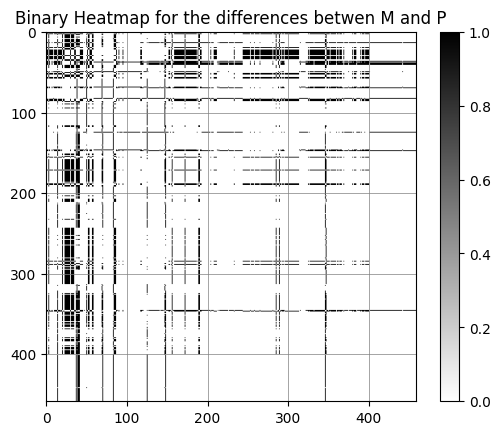

In [9]:
# 1.8 plot M and P differences

# generate a differnce matrix between M and P

diff_matrix=np.abs(M-P)

plt.imshow(diff_matrix, cmap='binary', interpolation=None)
plt.title("Binary Heatmap for the differences betwen M and P")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.colorbar()

plt.show()

In [10]:
# 1.9 Code to answer the questions

# Compare M and P
print("The number of entries that M and P share together are: "+str(np.sum(M == P)))
print("The total elements that M and P each has: "+ str(M.shape[0]*M.shape[0]))

print("The probability of elements that are shared among in M and P is: "+str(np.sum(M == P))+"/"+str(M.shape[0]*M.shape[0])+"="+str(np.sum(M == P)/(M.shape[0]*M.shape[0])))
print("The percentage of elements that are shared among in M and P is: "+ str(np.sum(M == P)/(M.shape[0]*M.shape[0])*100)+ "%")

The number of entries that M and P share together are: 193813
The total elements that M and P each has: 210681
The probability of elements that are shared among in M and P is: 193813/210681=0.9199358271510008
The percentage of elements that are shared among in M and P is: 91.99358271510008%


# Question 2

In [11]:
# 2.1 Perform k-means on the full-dimensional data ten times

inertia_list=[]
M_list=[]

labels=[]

# 10 times using a for loop
for i in range(10):
    # using k clusters each time but ten different sets of initial values for cluster centroids
    kmeans_loop=KMeans(n_clusters=4, init="random")
    # fit the k-means model (fit or fit_predict)
    kmeans_10=kmeans_loop.fit(std_df)
    inertia_list.append(kmeans_10.inertia_)

    # Generate matrices M1, . . . , M10 indicating whether given pairs of observations are in the same cluster,
    item=np.zeros((std_df.shape[0], std_df.shape[0]))

    for i in range(std_df.shape[0]):
        for j in range(std_df.shape[0]):
            if kmeans_10.labels_[i]==kmeans_10.labels_[j]:
                item[i][j]=1.0

    M_list.append(item)

    labels.append(kmeans_10.labels_)

print(inertia_list) # ranges around 11560-11570

# print(test)
# print(M_list) # (10, 459), 10 M each with 459 lables --> SUCCESS


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

[12616.628944103353, 12607.88888132374, 12608.364371864738, 12615.26136053539, 12608.29204998733, 12608.29204998733, 12613.837626461165, 12617.779304047628, 12607.843143541892, 12608.500416345165]


In [14]:
# 2.2 Compare each M1 to M10 with M
# Note: since the results are stochastic: they may have different results for each time it generates from 2.1

for i in range(10):
    print("The number of entries that M"+str(i+1)+" and M share together are: "+str(np.sum(M_list[i] == M)))
    print("The total elements that M"+str(i+1)+" and M each has: "+ str(M.shape[0]*M.shape[0]))

    print("The probability of elements that are shared among in M"+str(i+1)+" and M is: "+str(np.sum(M_list[i] == M))+"/"+str(M.shape[0]*M.shape[0])+"="+str(np.sum(M_list[i] == M)/(M.shape[0]*M.shape[0])))
    print("The percentage of elements that are shared among in M"+str(i+1)+" and M is: "+ str(np.sum(M_list[i] == M)/(M.shape[0]*M.shape[0])*100)+ "%")
    print()
    print()

The number of entries that M1 and M share together are: 208853
The total elements that M1 and M each has: 210681
The probability of elements that are shared among in M1 and M is: 208853/210681=0.9913233751501085
The percentage of elements that are shared among in M1 and M is: 99.13233751501085%


The number of entries that M2 and M share together are: 201725
The total elements that M2 and M each has: 210681
The probability of elements that are shared among in M2 and M is: 201725/210681=0.9574902340505314
The percentage of elements that are shared among in M2 and M is: 95.74902340505314%


The number of entries that M3 and M share together are: 202297
The total elements that M3 and M each has: 210681
The probability of elements that are shared among in M3 and M is: 202297/210681=0.9602052392004974
The percentage of elements that are shared among in M3 and M is: 96.02052392004974%


The number of entries that M4 and M share together are: 210257
The total elements that M4 and M each has: 

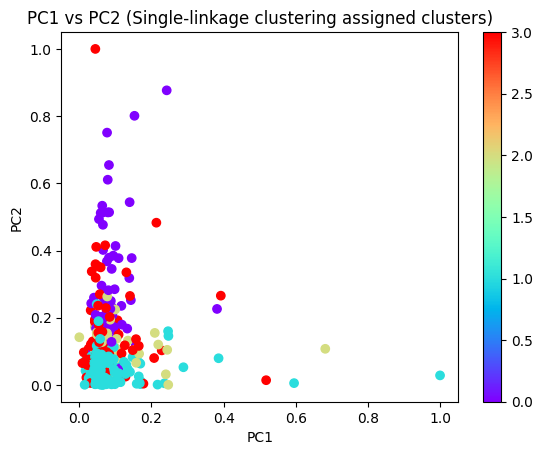

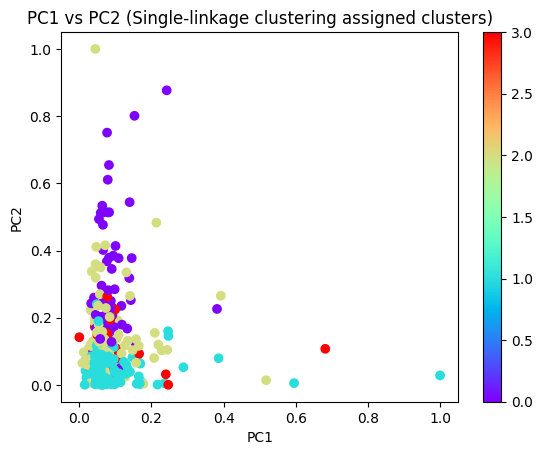

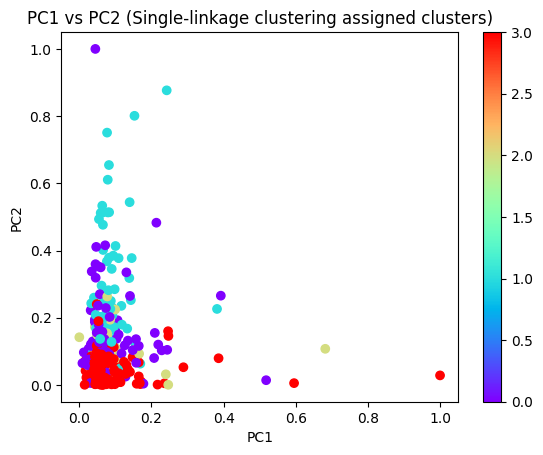

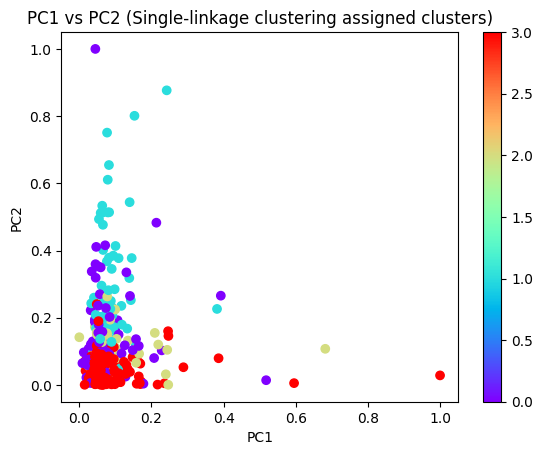

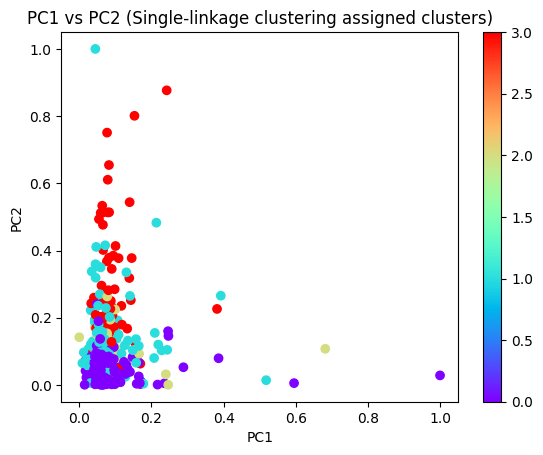

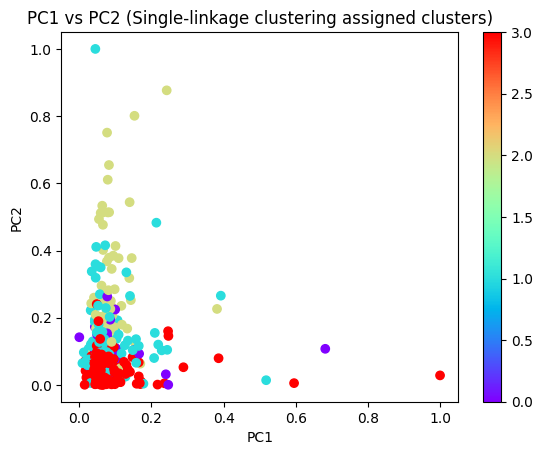

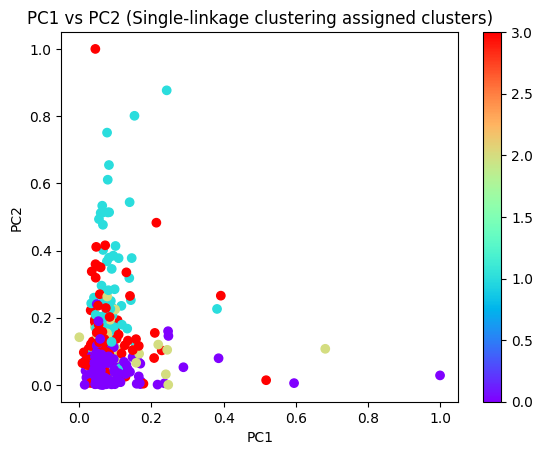

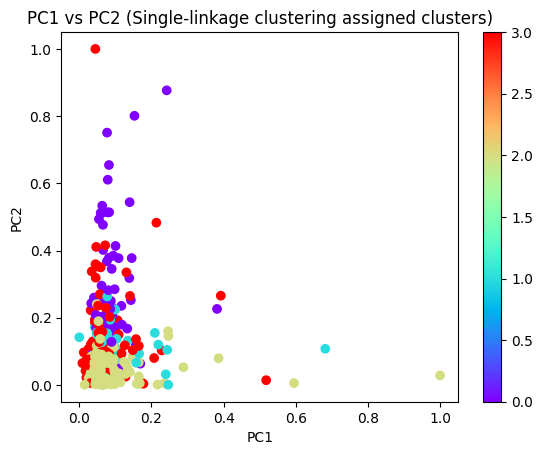

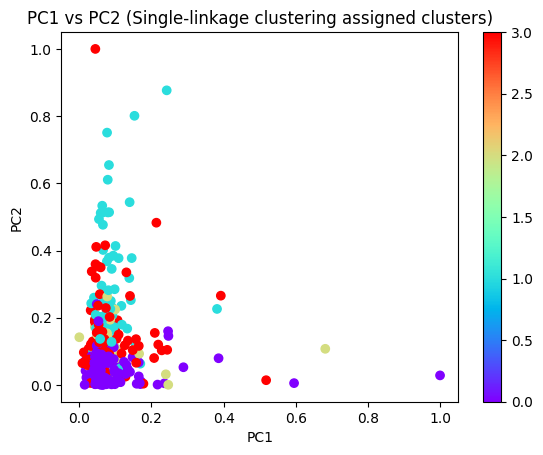

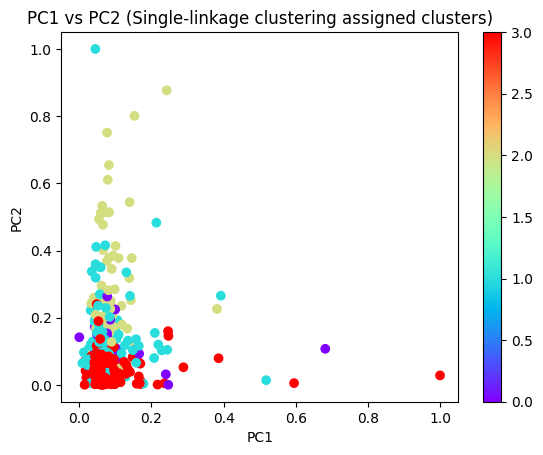

<Figure size 640x480 with 0 Axes>

In [15]:
# 2.3 Plot M1 to M10 out

for i in range(10):
    plt.scatter(std_df[0],std_df[1], c=labels[i], cmap='rainbow')
    plt.title("PC1 vs PC2 (Single-linkage clustering assigned clusters)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.colorbar()
    plt.show()
    plt.tight_layout()


In [16]:
# 2.4  Answer qustions 

# Check robustness
percentages=[]
# Compare M1 to M10 with M using for loop
for i in M_list:
    percentages.append(np.sum(i==M)/(std_df.shape[0]*std_df.shape[0]))

# M_list has the shape 10*459*459

# find the indices that appears in at least one of the 10 matrices
counter_any=0
for i in range(M_list[0].shape[0]):
    for j in range(M_list[0].shape[1]):
        found=False
        for k in range(len(M_list)):
            if M_list[k][i,j]==1:
                found=True
                break # for faster output
        if found:
            counter_any+=1

print(counter_any)

# find the indices that appears in all 10 matrices
counter_all=0
for i in range(M_list[0].shape[0]):
    for j in range(M_list[0].shape[1]):
        found=True
        for k in range(len(M_list)):
            if not M_list[k][i,j]==1:
                found=False
                break # for faster output
        if found:
            counter_all+=1
print(counter_all)

percent_all_runs=counter_all/counter_any*100

# divide counter_all by counter_any to determine the ratio/ percentage of same cluster in all 10 runs out of same cluster in at least 1 run
print("\nThe percentage were in the same cluster in all ten runs compared to the same cluster in at least one run is: ")
print(str(counter_all)+"/"+str(counter_any)+"="+str(percent_all_runs)+"%")

    

66707
53767

The percentage were in the same cluster in all ten runs compared to the same cluster in at least one run is: 
53767/66707=80.60173594975039%


# Question 3

In [17]:
# 3.1 Implement single-linkage clustering algorithm, then use it to perform clustering on reduced-dimensional data

# import the required modules to do single-linkage clustering
import scipy.cluster.hierarchy as shc
# Use scipy.spatial.distance to get pairwise difference (pdist), squareform(convert vector matrix to square matrix)
from scipy.spatial.distance import squareform, pdist

from sklearn.cluster import AgglomerativeClustering


# Plot Dendrogram
# plt.figure(figsize=(10,10))
# plt.title('Title')
# Dendrogram=shc.dendrogram((shc.linkage(reduced_df, method='single', metric='euclidean')))

ac=AgglomerativeClustering(n_clusters=4, linkage='single').fit(reduced_df)

# print(ac.labels_.shape) # returned 459*1


# create a matrix S for the result in the same way that you did M and P
S=np.zeros((reduced_df.shape[0], reduced_df.shape[0]))

for i in range(reduced_df.shape[0]):
    for j in range(reduced_df.shape[0]):
        if ac.labels_[i]==ac.labels_[j]:
            S[i][j]=1.0

# Codebase for 3.3 (answering how many entires S has in common with P
print("The number of entries that S and P share together are: "+str(np.sum(S == P)))
print("The total elements that M and P each has: "+ str(S.shape[0]*S.shape[0]))

print("The probability of elements that are shared among in M and P is: "+str(np.sum(S == P))+"/"+str(S.shape[0]*S.shape[0])+"="+str(np.sum(S == P)/(S.shape[0]*S.shape[0])))
print("The percentage of elements that are shared among in M and P is: "+ str(np.sum(S == P)/(S.shape[0]*S.shape[0])*100)+ "%")

The number of entries that S and P share together are: 57937
The total elements that M and P each has: 210681
The probability of elements that are shared among in M and P is: 57937/210681=0.2749986947090625
The percentage of elements that are shared among in M and P is: 27.49986947090625%


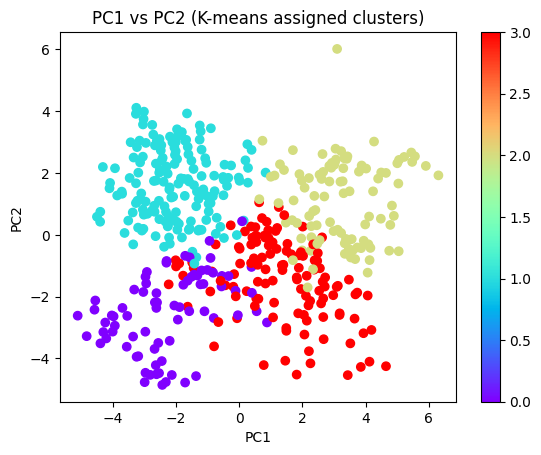

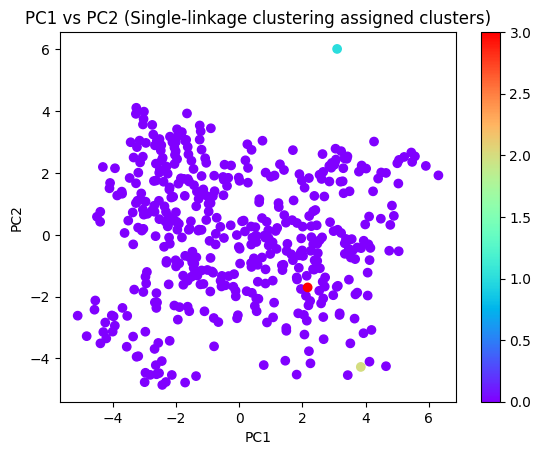

<Figure size 640x480 with 0 Axes>

In [18]:
# 3.2 Create two scatterplots of the observations in the reduced-dimensional dataset, 
# each with the first two principal components on the axes.

# Similar to what I did for my assignment 3

# plot the first one
 
 
# reduced_df[:,0]
plt.scatter(reduced_df[:,0],reduced_df[:,1], c=kmeans_reduce.labels_, cmap='rainbow')
plt.title("PC1 vs PC2 (K-means assigned clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

plt.scatter(reduced_df[:,0],reduced_df[:,1], c=ac.labels_, cmap='rainbow')
plt.title("PC1 vs PC2 (Single-linkage clustering assigned clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()
plt.tight_layout()

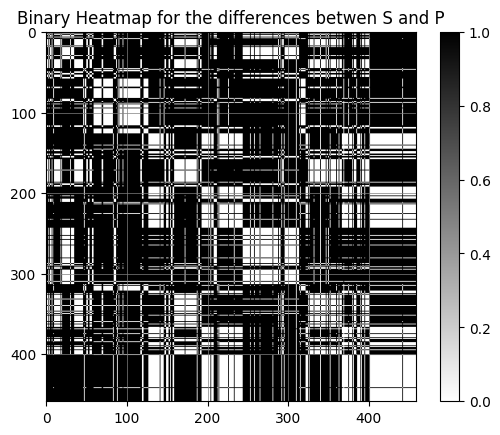

In [19]:
# 3.3 plot S and P differences

# generate a differnce matrix between S and P

diff_matrix_sp=np.abs(S-P)

plt.imshow(diff_matrix_sp, cmap='binary', interpolation=None)
plt.title("Binary Heatmap for the differences betwen S and P")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.colorbar()

plt.show()

# Question 4:

In [30]:
# 4.1 Use expectation-maximization(EM) algorithm with k clusters to probabilistically assign observations in the reduced-dimensional data to distributions/clusters.

# Import the required modules to implement EM
from sklearn.mixture import GaussianMixture

# Testing with fit
gm=GaussianMixture(n_components=4, init_params='k-means++').fit(reduced_df)
# print(gm.means_) # returned the weights of each mixture components

# Then predict
gm_predict=gm.predict(reduced_df)
# print(gm_predict) # returned proper results with clusters asgined


# Generate a new matrix 
# Create a new matrix E whose entries eij take values in [0, 1]: 
# for observations i and j, eij is the probability that i and j are in the same cluster.

# Prototype
gm_predict_prob=gm.predict_proba(reduced_df)
# print(gm_predict_proba)
# print(gm_predict_proba.shape[1])

E=np.zeros((reduced_df.shape[0], reduced_df.shape[0]))

for i in range(reduced_df.shape[0]):
    for j in range(reduced_df.shape[0]):
        # check whether i and j are in the same cluster: add the probabiltiies they are in clusters 0, 1, 2, 3
        temp_prob=0
        # sum the prob
        for k in range(gm_predict_prob.shape[1]):
            temp_prob+=(gm_predict_prob[i][k] * gm_predict_prob[j][k])
        # if gm_predict[i]==gm_predict[j]:
            # E[i][j]=gm_predict_proba[i][j]
        E[i][j]=temp_prob
# print(E)
# print(E.shape)

# Code to answer the question below:

# Count all the sums that are greater than 1% AND at least in 2 different clusters
total_samples=np.sum(np.sum(gm_predict_prob>0.01, axis=1)>1)
print("The total number of observations have at least two different clusters that they are assigned to with probability greater than 1%"+"are: \n",total_samples)

print("The percentage of observations have at least two different clusters that they are assigned to with probability greater than 1%"+"are: \n"+str(total_samples/reduced_df.shape[0]*100)+"%")

The total number of observations have at least two different clusters that they are assigned to with probability greater than 1%are: 
 284
The percentage of observations have at least two different clusters that they are assigned to with probability greater than 1%are: 
61.87363834422658%


# Question 5

(459, 2)


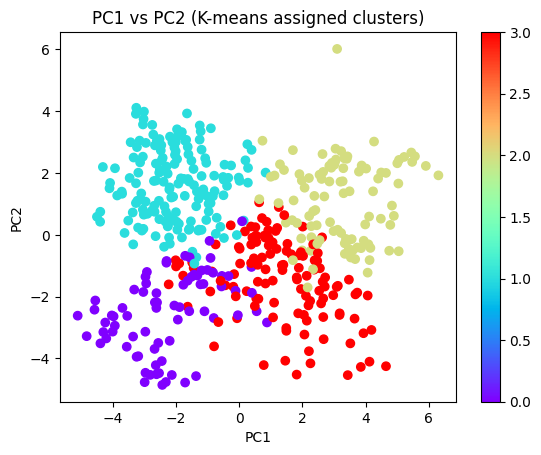

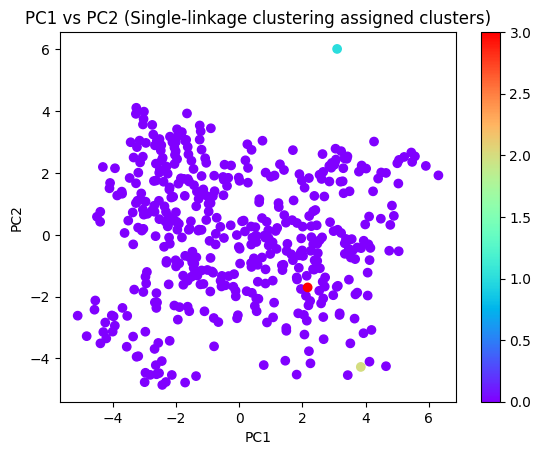

<Figure size 640x480 with 0 Axes>

In [31]:
# 5.1 Run t-SNE on the full-dimensional dataset (not the reduced dimensional one) with tuning parameters of your choice. 

# Import the required modules
from sklearn.manifold import TSNE

default_TSNE=TSNE().fit_transform(std_df)

print(default_TSNE.shape) # returned (459,2)

# plot the plots again from question 3
plt.scatter(reduced_df[:,0],reduced_df[:,1], c=kmeans_reduce.labels_, cmap='rainbow')
plt.title("PC1 vs PC2 (K-means assigned clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

plt.scatter(reduced_df[:,0],reduced_df[:,1], c=ac.labels_, cmap='rainbow')
plt.title("PC1 vs PC2 (Single-linkage clustering assigned clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()
plt.tight_layout()

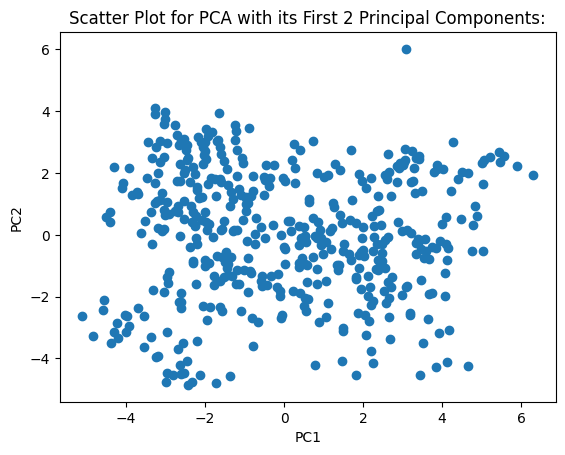

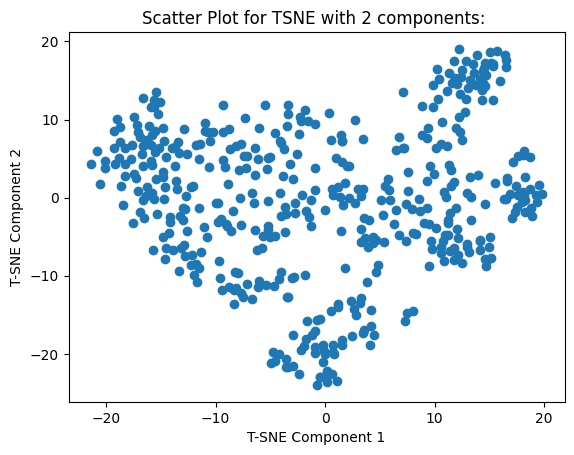

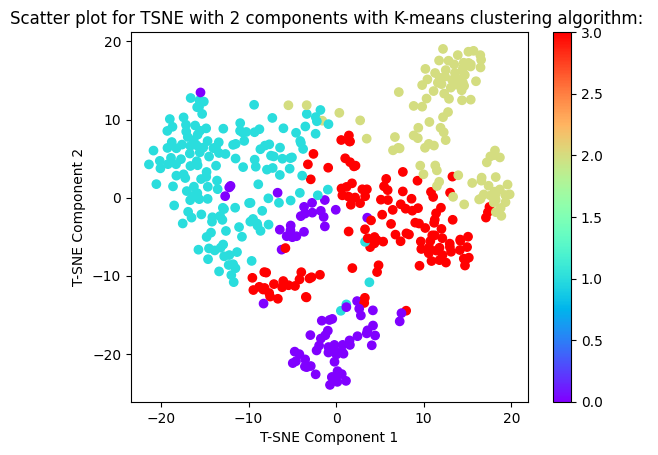

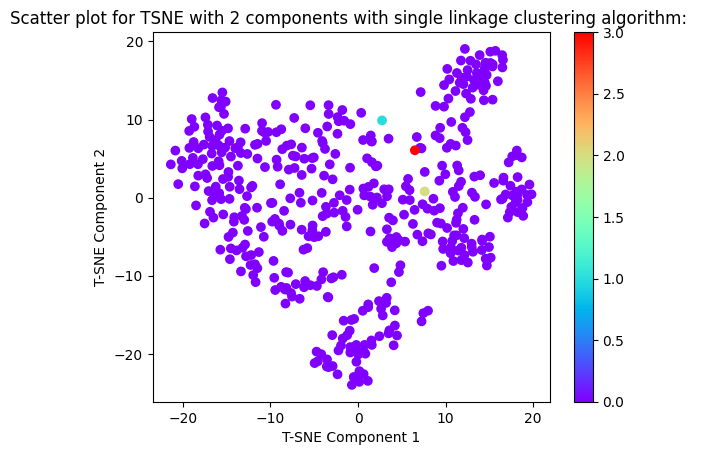

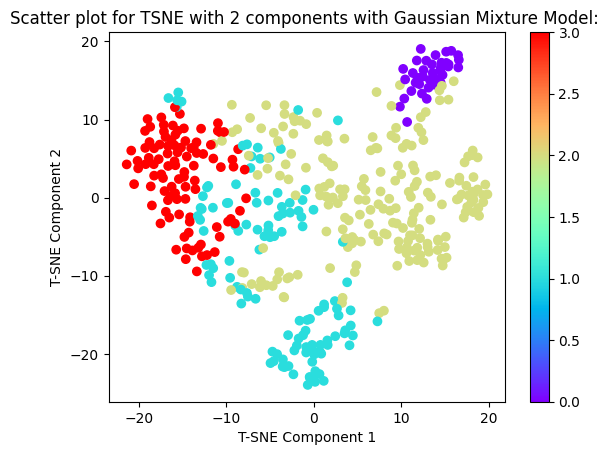

<Figure size 640x480 with 0 Axes>

In [32]:
# 5.2 plot all the required plots out

# plot PCA
plt.scatter(reduced_df[:,0],reduced_df[:,1], )
plt.title("Scatter Plot for PCA with its First 2 Principal Components:")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# plot t-SNE
plt.scatter(default_TSNE[:,0],default_TSNE[:,1])
plt.title("Scatter Plot for TSNE with 2 components: ")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
# plt.colorbar()
plt.show()
plt.tight_layout()

# plot it
plt.scatter(default_TSNE[:,0],default_TSNE[:,1], c=kmeans_reduce.labels_, cmap='rainbow')
plt.title("Scatter plot for TSNE with 2 components with K-means clustering algorithm: ")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.colorbar()
plt.show()
plt.tight_layout()

plt.scatter(default_TSNE[:,0],default_TSNE[:,1], c=ac.labels_, cmap='rainbow')
plt.title("Scatter plot for TSNE with 2 components with single linkage clustering algorithm: ")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.colorbar()
plt.show()
plt.tight_layout()

plt.scatter(default_TSNE[:,0],default_TSNE[:,1], c=gm_predict, cmap='rainbow')
plt.title("Scatter plot for TSNE with 2 components with Gaussian Mixture Model: ")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.colorbar()
plt.show()
plt.tight_layout()


# Project Extension Part 1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4

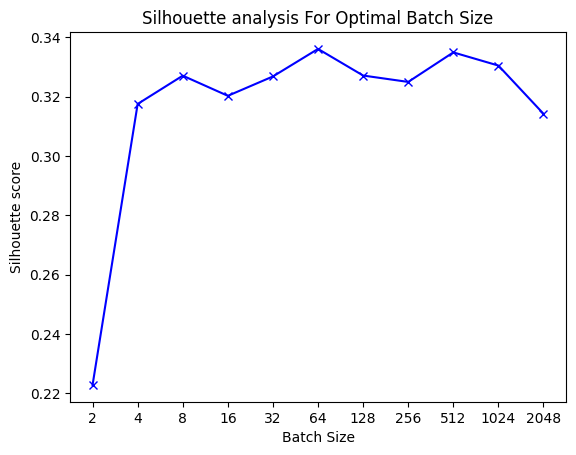

The optimal batch size is:  64

The score for mini-batch 4-means clustering on regular data is:
-2462.388890283499

The inertria for mini-batch 4-means clustering on regular data is:
2462.3888902834997

The labels for mini-batch 4-means clustering on regular data is:
[0 0 0 3 0 3 3 0 3 1 0 0 0 0 2 0 0 0 3 0 3 3 3 3 3 0 3 3 3 3 0 3 3 3 3 0 0
 0 1 0 2 0 0 0 0 0 1 2 1 2 0 0 3 3 0 0 0 3 3 1 1 1 1 1 1 1 1 1 1 0 2 2 1 1
 1 1 1 1 1 1 1 1 1 2 0 3 3 0 2 2 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 2 2 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 0
 2 2 2 2 0 0 2 3 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 3 3 0 0 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 3 3 3 1 2 1 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2
 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 0 0 3 0 2 0 0 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 1 1 1 1 1 2 2 2 0 2 0 0 0 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 0 0 3 0 2 0 0 0 0 0 0 0 1 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# 6.1 # Connectivity-based Clustering (Hierarchical Clustering) on the original data

# Mini-Batch K-means

from sklearn.cluster import MiniBatchKMeans

# Silhouette Analysis:

range_mini_batch=[2,4,8,16,32,64,128,256, 512, 1024, 2048]
MBK_SSE_list=[]
MBK_silhouette_avg = []

for num_batch_size in range_mini_batch:
    MBKmeans = MiniBatchKMeans(n_clusters = 4, batch_size=num_batch_size)
    MBKmeans.fit(reduced_df)
    # Append the metrics to lists
    MBK_SSE_list.append(MBKmeans.inertia_)
    MBK_silhouette_avg.append(silhouette_score(reduced_df, MBKmeans.labels_))

# plotting above
plt.plot(list(map(str, range_mini_batch)),MBK_silhouette_avg,'bx-')
plt.xlabel('Batch Size') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal Batch Size')
plt.show()

print("The optimal batch size is: ",range_mini_batch[np.argmax(MBK_silhouette_avg)])
optimal_batch_size=range_mini_batch[np.argmax(MBK_silhouette_avg)]


# fitting on the optimal batch size
MBKmeans_best=MiniBatchKMeans(n_clusters=4, batch_size=optimal_batch_size)

# fit the k-means model (fit OR fit_predict)
MBKmeans_best.fit_predict(reduced_df)

# Get the score
print("\nThe score for mini-batch 4-means clustering on regular data is:")
print(MBKmeans_best.score(reduced_df)) # returned -12615.62441662376

# Get the inertia, sum of distances of samples to their cloeses cluster center
print("\nThe inertria for mini-batch 4-means clustering on regular data is:")
print(MBKmeans_best.inertia_) # returned 12615.62441662376

# Note which cluster each observation is in
print("\nThe labels for mini-batch 4-means clustering on regular data is:")
print(MBKmeans_best.labels_) # returned an array that shows which cluster each observation is in


The optimal metric is:  euclidean


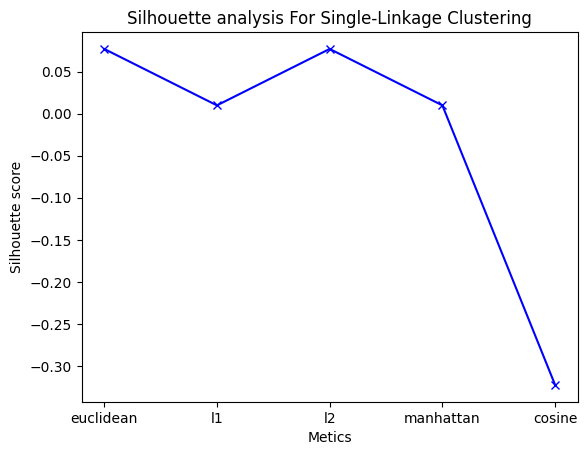

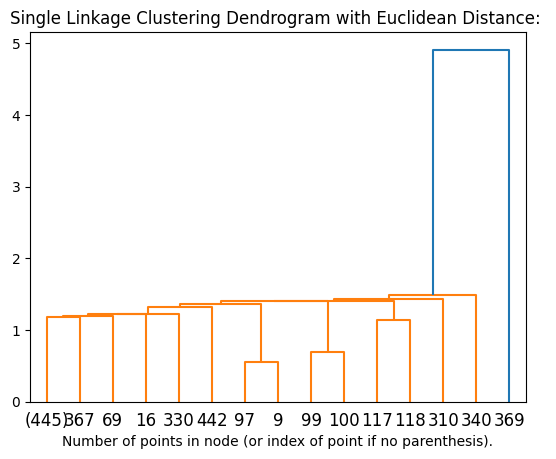

In [34]:
# 6.2 

# Agglomerative Approach (bottom-up)

# Improved single-linkage (choose best linkage and distance method)

from sklearn.cluster import AgglomerativeClustering

# Silhouette Analysis:

range_metric=['euclidean','l1','l2', 'manhattan', 'cosine']
AC_SSE_list=[]
AC_silhouette_avg = []

for metric in range_metric:
    AC_grid = AgglomerativeClustering(n_clusters = 4, metric=metric, linkage='single')
    AC_grid.fit(reduced_df)
    # Append the metrics to lists
    # AC_SSE_list.append(MBKmeans.inertia_)
    AC_silhouette_avg.append(silhouette_score(reduced_df, AC_grid.labels_))

optimal_metric=range_metric[np.argmax(AC_silhouette_avg)]
print("The optimal metric is: ",optimal_metric)
# find the best metric for SLC:

# plotting above
plt.plot(list(map(str, range_metric)),AC_silhouette_avg,'bx-')
plt.xlabel('Metics') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Single-Linkage Clustering')
plt.show()


# plot dendrogram (reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


AC_final = AgglomerativeClustering(n_clusters = 4, metric=optimal_metric, linkage='single', compute_distances=True)
AC_final=AC_final.fit(reduced_df)

plt.title("Single Linkage Clustering Dendrogram with "+ optimal_metric.capitalize()+" Distance: ")
# plot the top three levels of the dendrogram
plot_dendrogram(AC_final, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

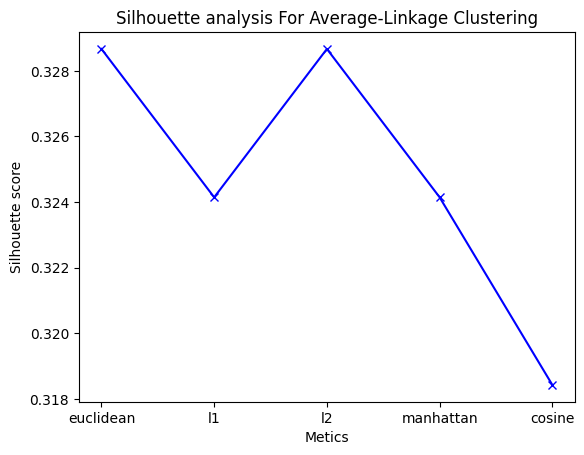

The optimal metric for average linkage is:  euclidean


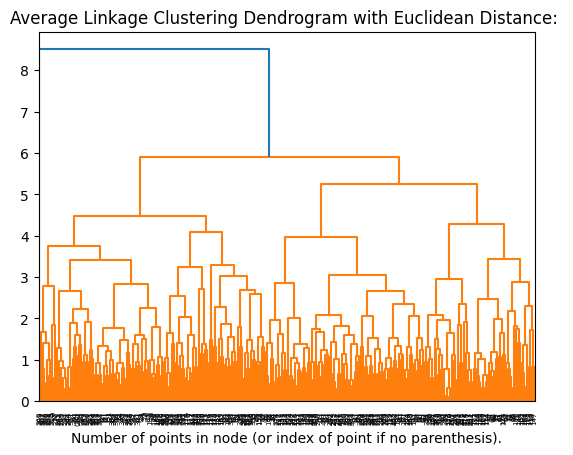

In [44]:
# 6.3 

# Agglomerative Approach (bottom-up)

# average-linkage (choose best linkage and distance method)

# Silhouette Analysis:

range_metric=['euclidean','l1','l2', 'manhattan', 'cosine']
AC_SSE_list=[]
AC_avg_silhouette_avg = []

for metric in range_metric:
    AC_avg_grid = AgglomerativeClustering(n_clusters = 4, metric=metric, linkage='average')
    AC_avg_grid.fit(reduced_df)
    # Append the metrics to lists
    # AC_SSE_list.append(MBKmeans.inertia_)
    AC_avg_silhouette_avg.append(silhouette_score(reduced_df, AC_avg_grid.labels_))

# plotting above
plt.plot(list(map(str, range_metric)),AC_avg_silhouette_avg,'bx-')
plt.xlabel('Metics') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Average-Linkage Clustering')
plt.show()

optimal_metric=range_metric[np.argmax(AC_avg_silhouette_avg)]
print("The optimal metric for average linkage is: ",optimal_metric)

AC_avg_final = AgglomerativeClustering(n_clusters = 4, metric=optimal_metric, linkage='average', compute_distances=True)
AC_avg_final=AC_avg_final.fit(reduced_df)


plt.title("Average Linkage Clustering Dendrogram with "+ optimal_metric.capitalize()+" Distance: ")
# plot the top three levels of the dendrogram
# reuse plot dendrogram fucntion from above
plot_dendrogram(AC_avg_final, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

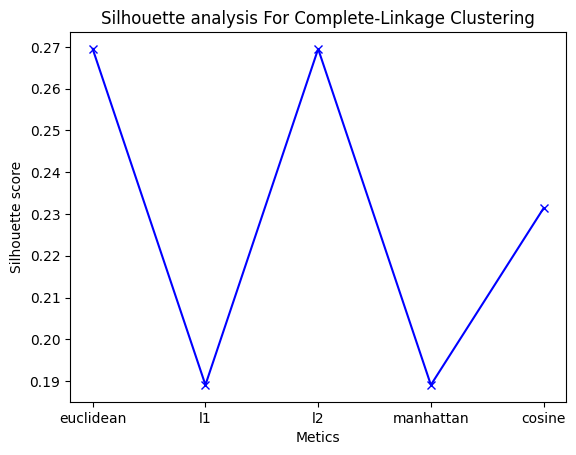

The optimal metric for complete linkage is:  euclidean


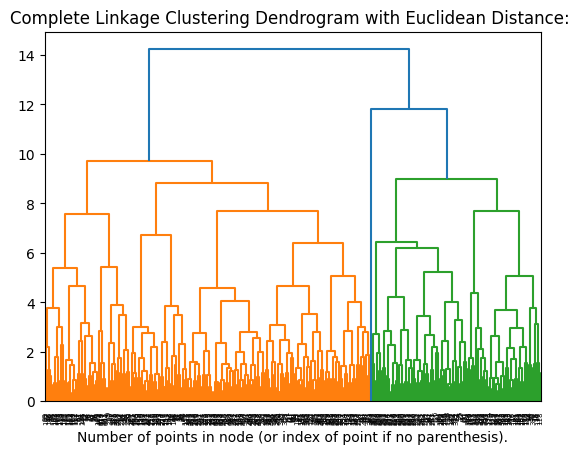

In [43]:
# 6.4 
# Agglomerative Approach (bottom-up)

# Compelte-linkage (choose best linkage and distance method)

# Silhouette Analysis:

range_metric=['euclidean','l1','l2', 'manhattan', 'cosine']
AC_SSE_list=[]
AC_com_silhouette_avg = []

for metric in range_metric:
    AC_com_grid = AgglomerativeClustering(n_clusters = 4, metric=metric, linkage='complete')
    AC_com_grid.fit(reduced_df)
    # Append the metrics to lists
    # AC_SSE_list.append(MBKmeans.inertia_)
    AC_com_silhouette_avg.append(silhouette_score(reduced_df, AC_com_grid.labels_))

# plotting above
plt.plot(list(map(str, range_metric)),AC_com_silhouette_avg,'bx-')
plt.xlabel('Metics') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Complete-Linkage Clustering')
plt.show()

optimal_metric=range_metric[np.argmax(AC_com_silhouette_avg)]
print("The optimal metric for complete linkage is: ",optimal_metric)

AC_com_final = AgglomerativeClustering(n_clusters = 4, metric=optimal_metric, linkage='complete', compute_distances=True)
AC_com_final=AC_com_final.fit(reduced_df)


plt.title("Complete Linkage Clustering Dendrogram with "+ optimal_metric.capitalize()+" Distance: ")
# plot the top three levels of the dendrogram
# reuse plot dendrogram fucntion from above
plot_dendrogram(AC_com_final, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

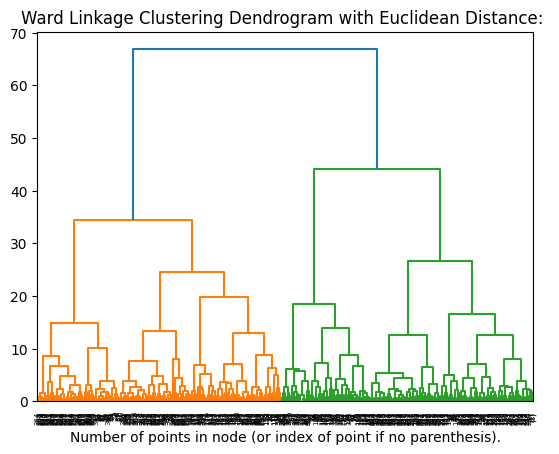

In [37]:
# 6.5

# Agglomerative Approach (bottom-up)

# Ward-linkage (choose best linkage and distance method)

# Silhouette Analysis:
# No need for Silhoutete analysis on metrics beause ward only accepts eucldiean distance

AC_ward = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage='ward', compute_distances=True)
AC_ward=AC_ward.fit(reduced_df)


plt.title("Ward Linkage Clustering Dendrogram with Euclidean Distance: ")
# plot the top three levels of the dendrogram
# reuse plot dendrogram fucntion from above
plot_dendrogram(AC_ward, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


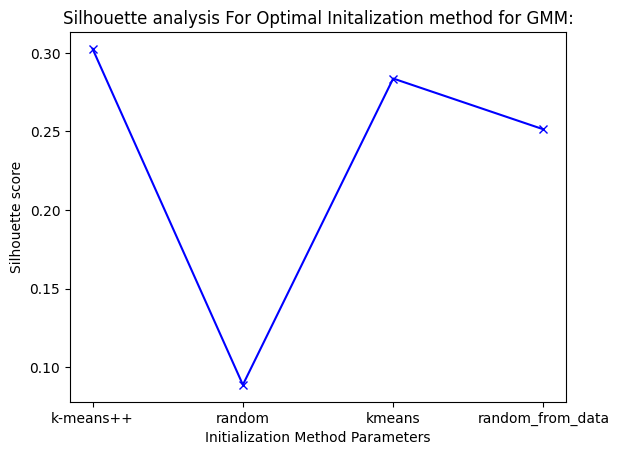

The optimal init method is:  k-means++


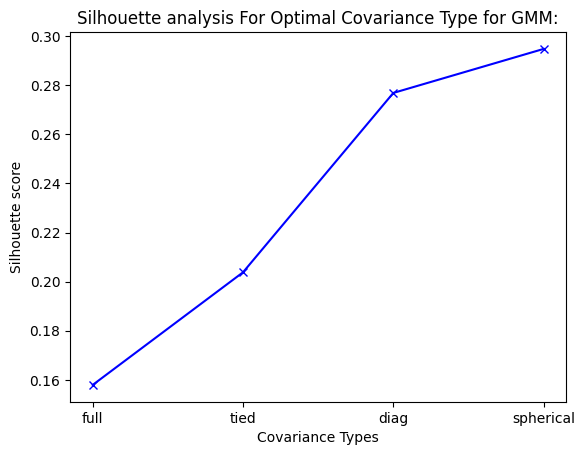

The optimal init method is: spherical
[1 2 1 2 2 3 3 2 3 1 2 2 1 1 1 1 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 1 0 0 0 0 0 0 0 0 1 1 3 1 1 0 3 3 3 1 1 0 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 3 3 3 3 3 3 3 1 0 3 3 3 3 1
 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 2 3 3 2 2 1 2 2 2 1 1 2 1 1
 2 3 2 1 2 2 1 2 1 1 3 2 3 1 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 1 2 2 1 1 1 1 0 0 1 1 2 2 1 1 1 2 1 1 1 1 0 0 0 1 1
 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [38]:
# 6.6

# GMM Re-tune

# Tune: init_params and covariance_types

# Silhouette Analysis:
range_init_params=['k-means++', 'random', 'kmeans', 'random_from_data']

GMM_SSE_list=[]
GMM_silhouette_avg = []

for init_param in range_init_params:
    gm=GaussianMixture(n_components=4, init_params=init_param)
    gm.fit(reduced_df)
    gm_predict=gm.predict(reduced_df)
    # Append the metrics to lists
    # GM_SSE_list.append(BKmeans.inertia_)
    GMM_silhouette_avg.append(silhouette_score(reduced_df, gm_predict))

# plotting above
plt.plot(range_init_params,GMM_silhouette_avg,'bx-')
plt.xlabel('Initialization Method Parameters') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal Initalization method for GMM:')
plt.show()

optimal_init_params=range_init_params[np.argmax(GMM_silhouette_avg)]
print("The optimal init method is: ",optimal_init_params)


range_cov_types=['full', 'tied', 'diag', 'spherical']

GMM_SSE_list_2=[]
GMM_silhouette_avg_2 = []

for cov_type in range_cov_types:
    gm=GaussianMixture(n_components=4, init_params=optimal_init_params, covariance_type=cov_type)
    gm.fit(reduced_df)
    gm_predict=gm.predict(reduced_df)
    # Append the metrics to lists
    # GM_SSE_list.append(BKmeans.inertia_)
    GMM_silhouette_avg_2.append(silhouette_score(reduced_df, gm_predict))

# plotting above
plt.plot(range_cov_types,GMM_silhouette_avg_2,'bx-')
plt.xlabel('Covariance Types') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal Covariance Type for GMM:')
plt.show()

optimal_cov_type=range_cov_types[np.argmax(GMM_silhouette_avg_2)]
print("The optimal init method is:",optimal_cov_type)

# Try GMM with the optimal variables

gm_final=GaussianMixture(n_components=4, init_params=optimal_init_params, covariance_type=optimal_cov_type)
gm_final.fit(reduced_df)
gm_final_predict=gm_final.predict(reduced_df)
print(gm_final_predict)

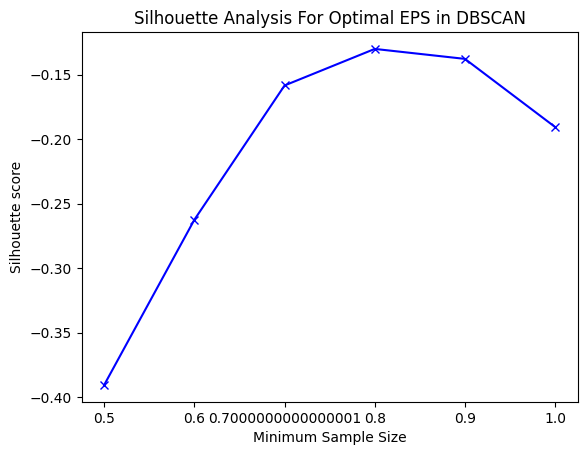

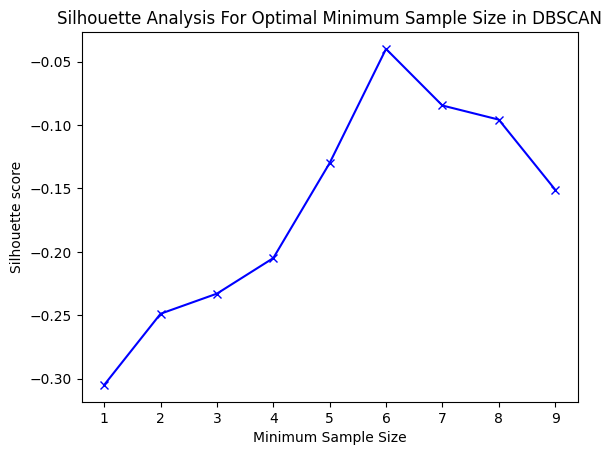

In [39]:
# 6.7

# DBSCAN

# Silhouette analysis
from sklearn.cluster import DBSCAN

AC_SSE_list=[]
DBS_grid_silhouette_avg=[]

# Define a range of epsilon values to explore
eps_values = np.linspace(0.1, 1.0, 10)
eps_list=[]
best_silhouette_score = -1
optimal_eps = None

# Iterate over epsilon values
for eps in eps_values:
    # Fit DBSCAN model with current epsilon
    dbscan_model = DBSCAN(eps=eps)
    cluster_labels = dbscan_model.fit_predict(reduced_df)

    # Check if the number of clusters is greater than 1 (DBSCAN should find at least one cluster)
    if len(set(cluster_labels)) > 1:
        # Compute silhouette score
        silhouette_avg = silhouette_score(reduced_df, cluster_labels)
        DBS_grid_silhouette_avg.append(silhouette_avg)
        eps_list.append(eps)

        if silhouette_avg > best_silhouette_score:
            optimal_eps=eps
            best_silhouette_score=silhouette_avg

# plotting above
plt.plot(list(map(str, eps_list)),DBS_grid_silhouette_avg,'bx-')
plt.xlabel('Minimum Sample Size') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis For Optimal EPS in DBSCAN')
plt.show()

best_silhouette_score_sample = -1
optimal_sample = None

# finding minimum sample size 
range_min_samples=np.arange(1, 10)
DBS_grid_silhouette_avg_samples=[]
sample_list=[]

# Iterate over epsilon values
for sample in range_min_samples:
    # Fit DBSCAN model with current epsilon
    dbscan_model = DBSCAN(eps=optimal_eps, min_samples=sample)
    cluster_labels = dbscan_model.fit_predict(reduced_df)

    # Check if the number of clusters is greater than 1 (DBSCAN should find at least one cluster)
    if len(set(cluster_labels)) > 1:
        # Compute silhouette score
        silhouette_avg = silhouette_score(reduced_df, cluster_labels)
        DBS_grid_silhouette_avg_samples.append(silhouette_avg)
        sample_list.append(sample)

        if silhouette_avg > best_silhouette_score_sample:
            optimal_sample=sample
            best_silhouette_score_sample=silhouette_avg

# print(optimal_sample)

# plotting above
plt.plot(list(map(str, sample_list)),DBS_grid_silhouette_avg_samples,'bx-')
plt.xlabel('Minimum Sample Size') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis For Optimal Minimum Sample Size in DBSCAN')
plt.show()

# Acutal fitting after finding the optimal sample size and eps

dbscan_final_model = DBSCAN(eps=optimal_eps, min_samples=optimal_sample)
dbscan_final_cluster_labels = dbscan_final_model.fit_predict(reduced_df)


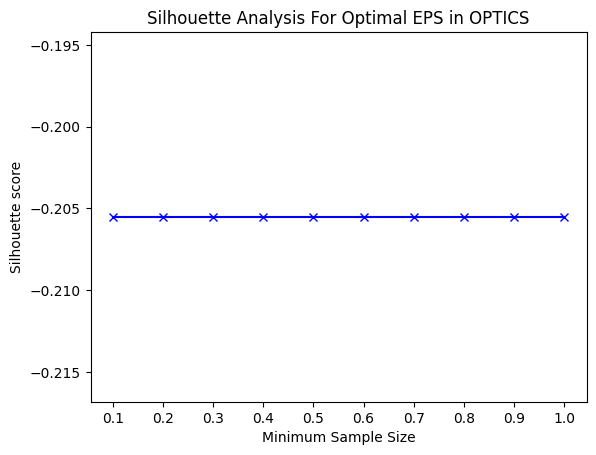

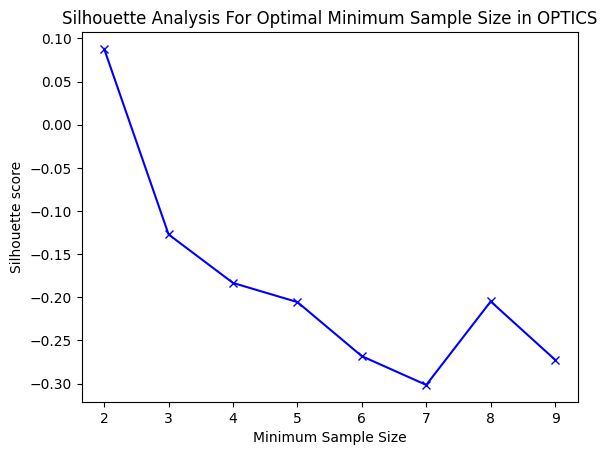

-1
None


In [40]:
# 6.8

# OPTICS

# Silhouette analysis
from sklearn.cluster import OPTICS

OPTICS_grid_silhouette_avg=[]

# Define a range of epsilon values to explore
eps_values = np.linspace(0.1, 1.0, 10)
eps_list=[]
best_eps_silhouette_score = -1
optimal_eps = None

# Iterate over epsilon values
for eps in eps_values:
    # Fit DBSCAN model with current epsilon
    optic_eps_model = OPTICS(eps=eps)
    cluster_labels = optic_eps_model.fit_predict(reduced_df)

    # Check if the number of clusters is greater than 1 (DBSCAN should find at least one cluster)
    if len(set(cluster_labels)) > 1:
        # Compute silhouette score
        silhouette_avg = silhouette_score(reduced_df, cluster_labels)
        OPTICS_grid_silhouette_avg.append(silhouette_avg)
        eps_list.append(round(eps,1))

        if silhouette_avg > best_silhouette_score:
            optimal_eps=eps
            best_eps_silhouette_score=silhouette_avg

# plotting above
plt.plot(list(map(str, eps_list)),OPTICS_grid_silhouette_avg,'bx-')
plt.xlabel('Minimum Sample Size') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis For Optimal EPS in OPTICS')
plt.show()


# sample part
best_silhouette_score_sample = -1
optimal_sample = None

# finding minimum sample size 
range_min_samples=np.arange(1, 10)
OPTICS_grid_silhouette_avg_samples=[]
sample_list=[]

# Iterate over epsilon values
for sample in range_min_samples:
    # Fit DBSCAN model with current epsilon
    OPTICS_model = OPTICS(eps=optimal_eps, min_samples=sample)
    cluster_labels = OPTICS_model.fit_predict(reduced_df)

    # Check if the number of clusters is greater than 1 (DBSCAN should find at least one cluster)
    if len(set(cluster_labels)) > 1:
        # Compute silhouette score
        silhouette_avg = silhouette_score(reduced_df, cluster_labels)
        OPTICS_grid_silhouette_avg_samples.append(silhouette_avg)
        sample_list.append(sample)

        if silhouette_avg > best_silhouette_score_sample:
            optimal_sample=sample
            best_silhouette_score_sample=silhouette_avg

# plotting above
plt.plot(list(map(str, sample_list)),OPTICS_grid_silhouette_avg_samples,'bx-')
plt.xlabel('Minimum Sample Size') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis For Optimal Minimum Sample Size in OPTICS')
plt.show()

print(best_eps_silhouette_score)
print(optimal_eps)

# Acutal fitting after finding the optimal sample size and eps

OPTICS_final_model = OPTICS(eps=optimal_eps, min_samples=optimal_sample)
OPTICS_final_cluster_labels = OPTICS_final_model.fit_predict(reduced_df)

# print(OPTICS_final_cluster_labels)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


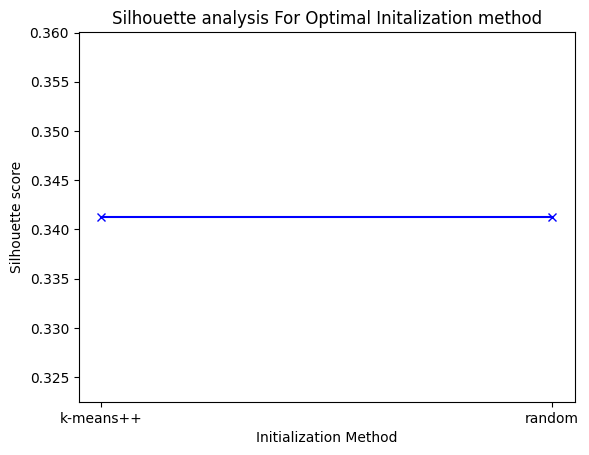

The optimal init method is:  k-means++

The score for Final 4-means clustering on regular data is:
-2446.856337546731

The inertria for Final 4-means clustering on regular data is:
2446.8563375467306


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
# 6.9 
# Re-tune required 

# K-MEANS (UPGRADED)

# Tune init aside from n_cluster

# Silhouette Analysis:
range_init=['k-means++', 'random']

K_SSE_list=[]
K_silhouette_avg = []

for init in range_init:
    Kmeans = KMeans(n_clusters = 4, init=init)
    Kmeans.fit(reduced_df)
    # Append the metrics to lists
    K_SSE_list.append(Kmeans.inertia_)
    K_silhouette_avg.append(silhouette_score(reduced_df, Kmeans.labels_))

# plotting above
plt.plot(range_init,K_silhouette_avg,'bx-')
plt.xlabel('Initialization Method') 
# plt.xticks(range_mini_batch)
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal Initalization method')
plt.show()

optimal_init=range_init[np.argmax(K_silhouette_avg)]
print("The optimal init method is: ",optimal_init)


# Fit after tuning
Kmeans_best=KMeans(n_clusters=4, init=optimal_init)

# fit the k-means model (fit OR fit_predict)
Kmeans_best.fit_predict(reduced_df)

# Get the score
print("\nThe score for Final 4-means clustering on regular data is:")
print(Kmeans_best.score(reduced_df)) # returned -12615.62441662376

# Get the inertia, sum of distances of samples to their cloeses cluster center
print("\nThe inertria for Final 4-means clustering on regular data is:")
print(Kmeans_best.inertia_) # returned 12615.62441662376

In [45]:
# 6.10
# Visualization method: plan to visualize all the plots below

def visualize(labels, method):
    plt.scatter(reduced_df[:,0],reduced_df[:,1], c=labels, cmap='rainbow')
    plt.title("PC1 vs PC2 (Tuned assigned clusters) for "+method+":")
    plt.xlabel("PC1")
    plt.ylabel("PC2") 
    plt.colorbar()
    plt.show()

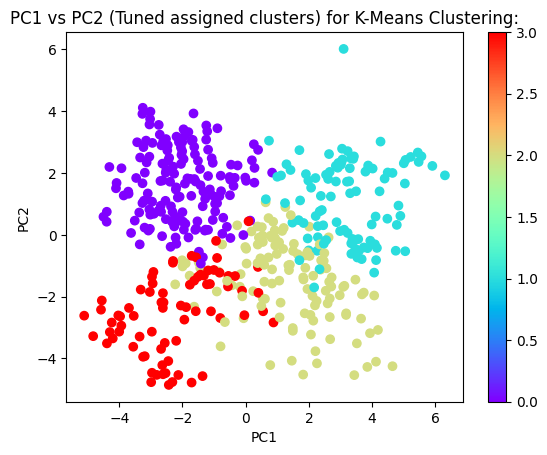

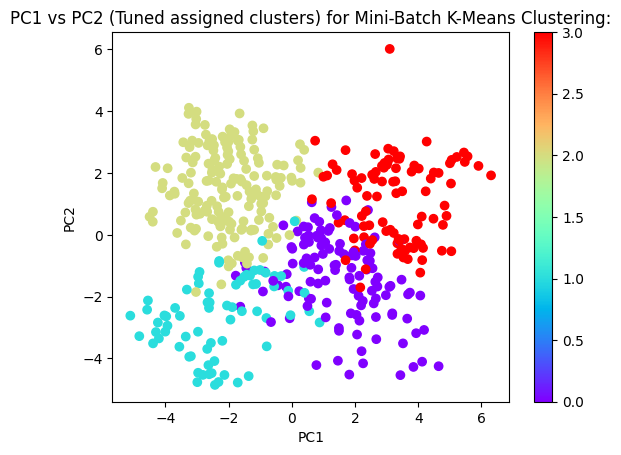

In [49]:
# 6.11

visualize(Kmeans_best.labels_, "K-Means Clustering")
visualize(MBKmeans_best.labels_, "Mini-Batch K-Means Clustering")

/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_22371/1897620572.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(circle_data[:, 0], circle_data[:, 1], s=50, cmap='viridis')


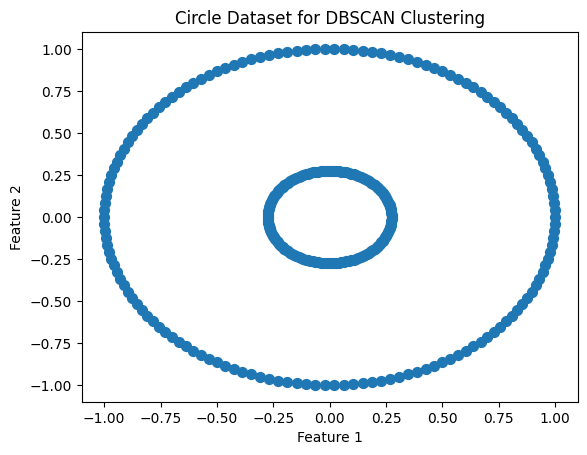

In [50]:
# 6.12

# Generate Circle Data for circle testing

from sklearn.datasets import make_circles

# Step 1: Generate a synthetic blob dataset
# def generate_blob_dataset(n_samples, centers, cluster_std):
circle_data, _ = make_circles(n_samples=300,factor=0.275)
    # return X

# Visualize the generated blob dataset
plt.scatter(circle_data[:, 0], circle_data[:, 1], s=50, cmap='viridis')
plt.title('Circle Dataset for DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()




/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_22371/3831008508.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(blobs_data[:, 0], blobs_data[:, 1], s=50, cmap='viridis')


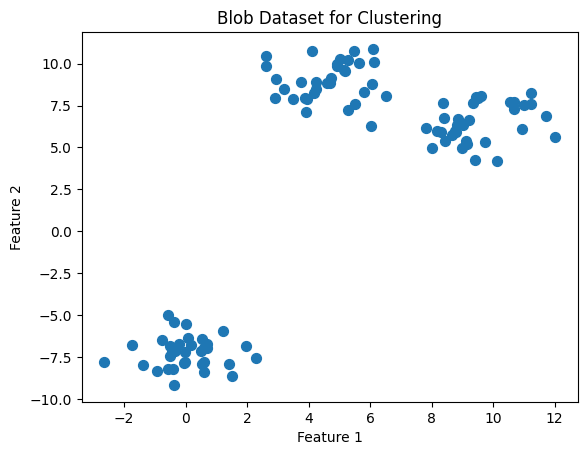

In [52]:
# 6.13 

# Generate BLOB Data for circle testing

from sklearn.datasets import make_blobs

# Step 1: Generate a synthetic blob dataset
# def generate_blob_dataset(n_samples, centers, cluster_std):
blobs_data, _ = make_blobs(n_samples=100)
    # return X

# Visualize the generated blob dataset
plt.scatter(blobs_data[:, 0], blobs_data[:, 1], s=50, cmap='viridis')
plt.title('Blob Dataset for Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


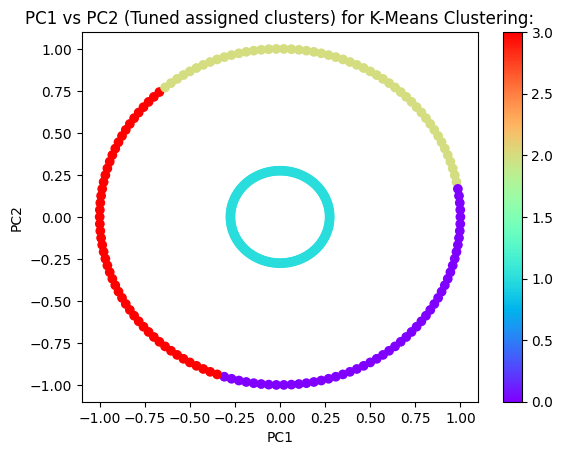

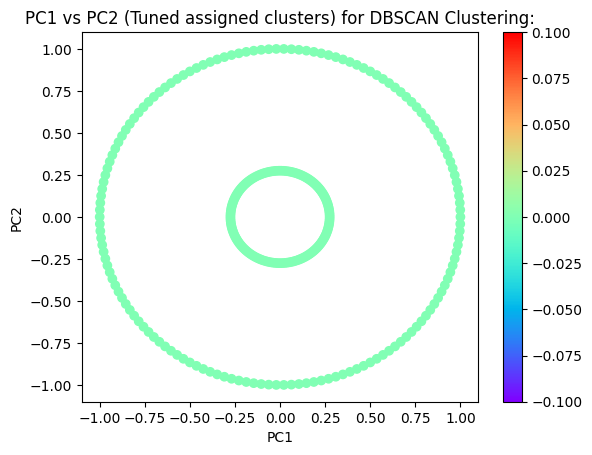

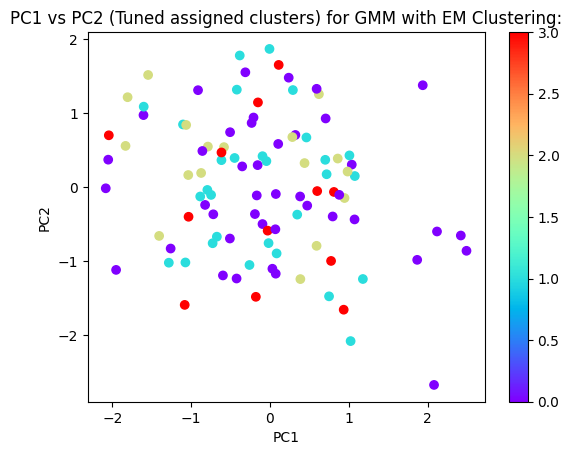

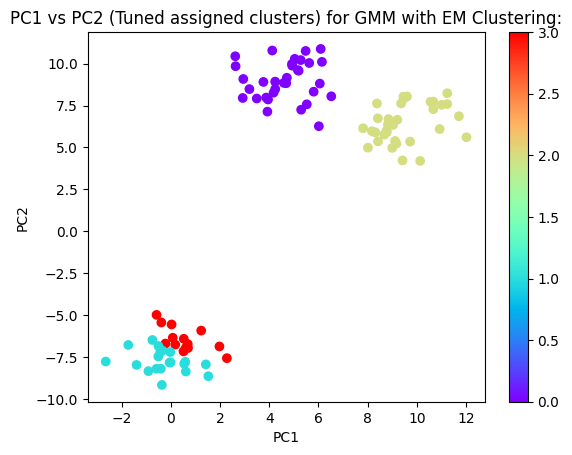

In [56]:
# 6.14

# For visualziation in the presentation

# 1 K-Means
# Fit after tuning
Kmeans_best_circle=KMeans(n_clusters=4, init=optimal_init)

# fit the k-means model (fit OR fit_predict)
Kmeans_best_circle.fit_predict(circle_data)

plt.scatter(circle_data[:,0],circle_data[:,1], c=Kmeans_best_circle.labels_, cmap='rainbow')
plt.title("PC1 vs PC2 (Tuned assigned clusters) for "+"K-Means Clustering"+":")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

# 2. DBSCAN
# Fit after tuning
dbscan_circle = DBSCAN(eps=optimal_eps, min_samples=optimal_sample)
dbscan_circle_labels = dbscan_final_model.fit_predict(circle_data)

plt.scatter(circle_data[:,0],circle_data[:,1], c=dbscan_circle_labels, cmap='rainbow')
plt.title("PC1 vs PC2 (Tuned assigned clusters) for "+"DBSCAN Clustering"+":")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

from sklearn.datasets import make_regression

reg_data, _=make_regression()

# 3. GMM (BAD)
# visualize(gm_final_predict, "GMM with EM Algo")

gm_final_reg=GaussianMixture(n_components=4, init_params=optimal_init_params, covariance_type=optimal_cov_type)
gm_final_reg_predict=gm_final.fit_predict(reg_data)

plt.scatter(reg_data[:,0],reg_data[:,1], c=gm_final_reg_predict, cmap='rainbow')
plt.title("PC1 vs PC2 (Tuned assigned clusters) for "+"GMM with EM Clustering"+":")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

# 4. GMM (GOOD)
# visualize(gm_final_predict, "GMM with EM Algo")

gm_final_blob=GaussianMixture(n_components=4, init_params=optimal_init_params, covariance_type=optimal_cov_type)
gm_final_blob_predict=gm_final.fit_predict(blobs_data)

plt.scatter(blobs_data[:,0],blobs_data[:,1], c=gm_final_blob_predict, cmap='rainbow')
plt.title("PC1 vs PC2 (Tuned assigned clusters) for "+"GMM with EM Clustering"+":")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()


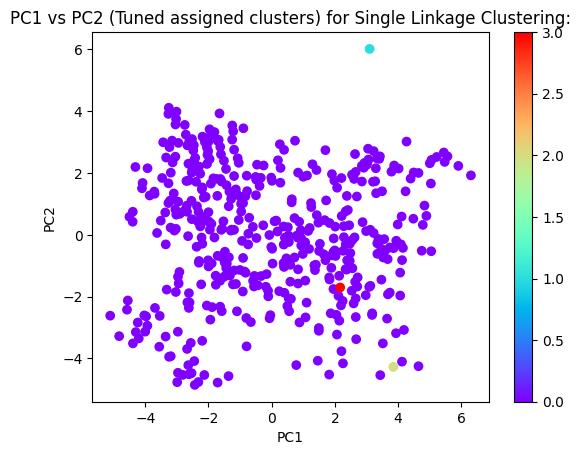

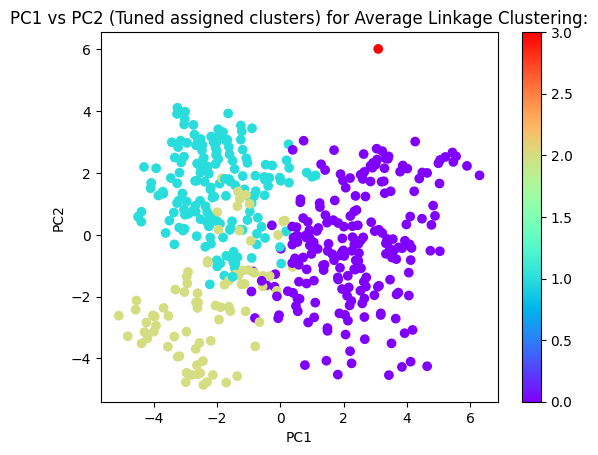

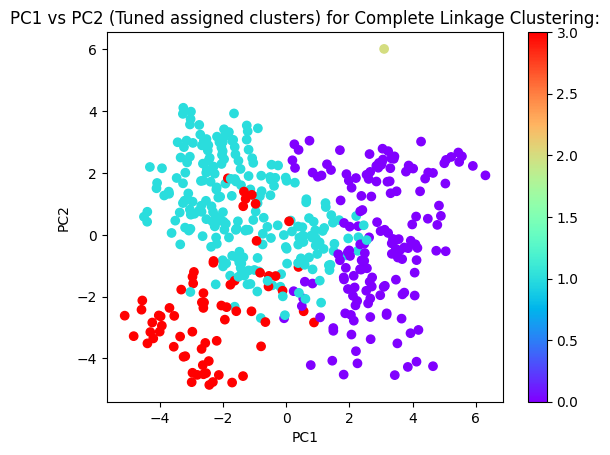

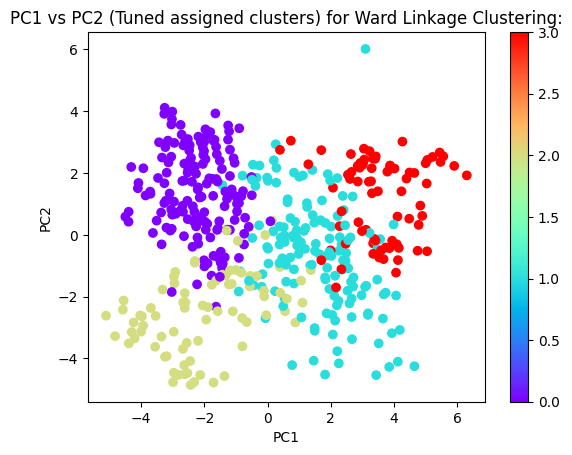

In [55]:
# 6.15

# Visualization for section 1 (hierarchical clustering)

# 1.1 Agglomerative (bottom-up)

# 1.1.1 Single-linkage clustering (AC_final)
visualize(AC_final.labels_, "Single Linkage Clustering")

# 1.1.2 Average-linkage clustering (AC_avg_final)
visualize(AC_avg_final.labels_, "Average Linkage Clustering")

# 1.1.3 Complete-linkage clustering (AC_com_final)
visualize(AC_com_final.labels_, "Complete Linkage Clustering")

# 1.1.4 Ward-linkage clustering (AC_ward)
visualize(AC_ward.labels_, "Ward Linkage Clustering")

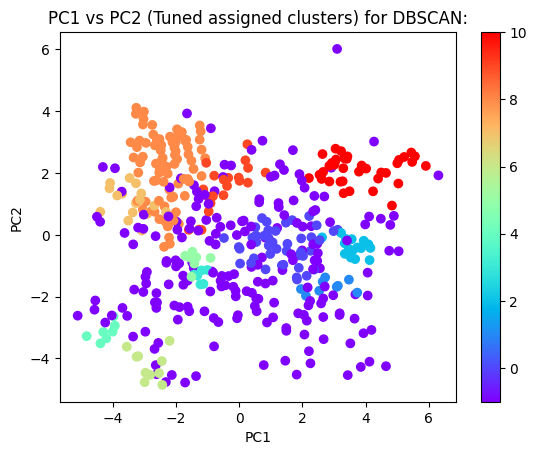

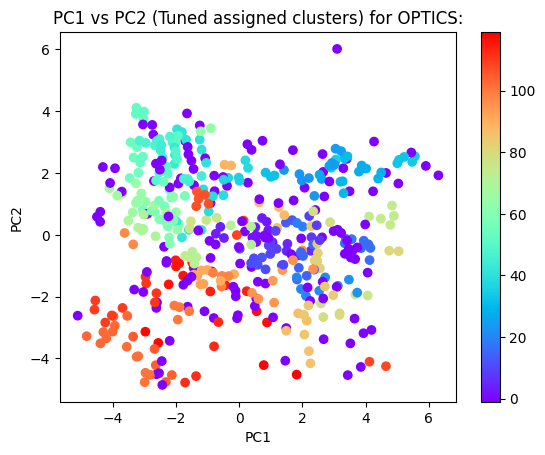

In [57]:
# 6.16

# Plotting for section 3 (Density Based Clustering)

# 3.1 DBSCAN (dbscan_final_cluster_labels)
visualize(dbscan_final_cluster_labels, "DBSCAN")

# 3.2 OPTICS (dbscan_final_cluster_labels)
visualize(OPTICS_final_cluster_labels, "OPTICS")

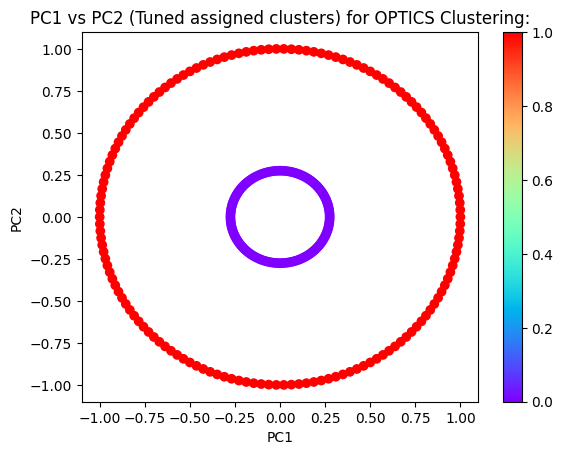

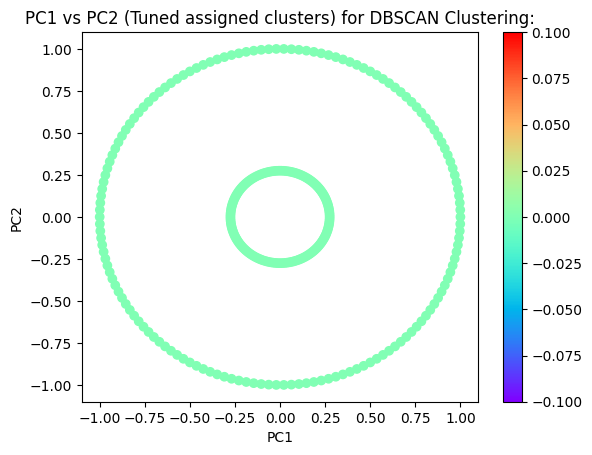

In [65]:
# 6.17

dbscan_final_model = DBSCAN(eps=0.8, min_samples=6)
dbscan_circle_labels = dbscan_final_model.fit_predict(circle_data)


optic_final_model = OPTICS(eps=0.8, min_samples=2)
optic_circle_labels = OPTICS_final_model.fit_predict(circle_data)

plt.scatter(circle_data[:,0],circle_data[:,1], c=optic_circle_labels, cmap='rainbow')
plt.title("PC1 vs PC2 (Tuned assigned clusters) for "+"OPTICS Clustering"+":")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

plt.scatter(circle_data[:,0],circle_data[:,1], c=dbscan_circle_labels, cmap='rainbow')
plt.title("PC1 vs PC2 (Tuned assigned clusters) for "+"DBSCAN Clustering"+":")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

# Project Extension Part 2

Classification Accuracy: 0.93
Confusion Matrix:
[[10  0  0]
 [ 0 11  0]
 [ 0  2  7]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.85      1.00      0.92        11
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



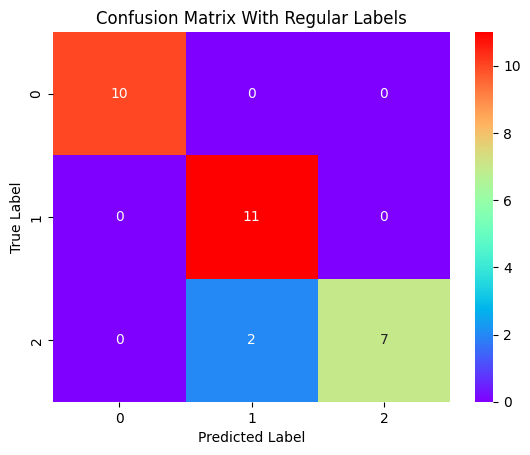

In [ ]:
# 7.1

# Classfication alone: RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets with a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the results
print(f"Classification Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_str)

# Plot the confusion matrix
# labels = ["Malignant", "Benign"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="rainbow")
plt.title("Confusion Matrix With Regular Labels")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


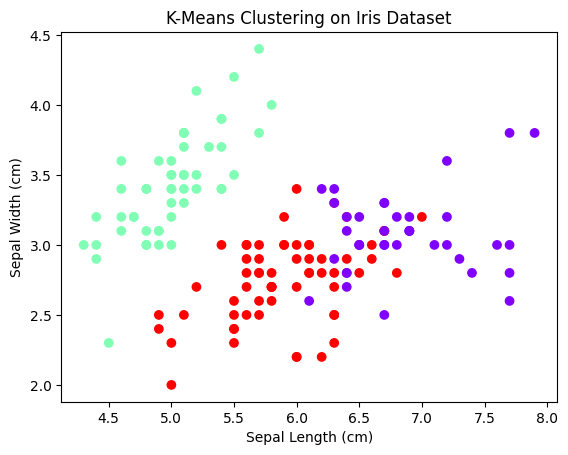

Classification Accuracy: 0.97


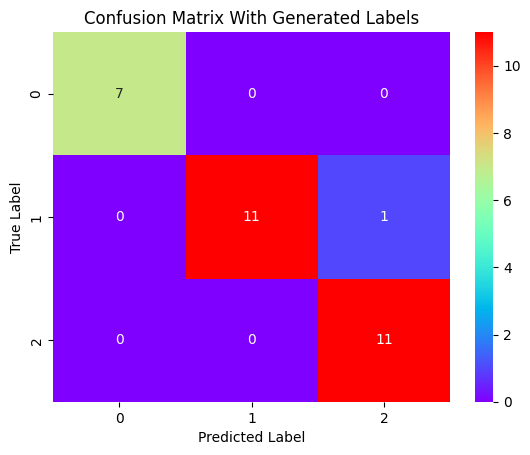

In [ ]:
# 7.2

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# print(X.shape)
# print(y.shape)

# Step 1: Perform K-Means clustering
kmeans = KMeans(n_clusters=3)
cluster_assignments = kmeans.fit_predict(X)

print(cluster_assignments)

# Visualize the clustering results (optional)
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='rainbow')
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

# Step 2: Use cluster assignments as features
X_with_clusters = np.column_stack([X, cluster_assignments])

# print(X_with_clusters)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_clusters, y, test_size=0.2)

# Step 4: Train a Random Forest classifier with extended feature space
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Step 5: Evaluate the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the results
print(f"Classification Accuracy: {accuracy:.2f}")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(classification_report_str)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="rainbow")
plt.title("Confusion Matrix With Generated Labels")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Now with a different dataset

In [ ]:
# 7.3

# Classfication alone: 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets

# Load the Iris dataset
inputs = datasets.load_breast_cancer()
X = inputs.data
y = inputs.target

# Split the data into training and testing sets with a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the results
print(f"Classification Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_str)


Classification Accuracy: 0.96
Confusion Matrix:
[[43  1]
 [ 4 66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        44
           1       0.99      0.94      0.96        70

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 0 1 2 1 2 2 2 2 2 1 2 2 2 2 1 3 2 0 0 2 3 1 1 2 1 2 1 1 2 1 1 2 2 2
 0 2 2 2 0 1 2 2 1 0 2 0 2 0 2 0 1 2 0 1 2 0 0 0 0 2 0 2 2 0 0 0 0 1 0 1 2
 0 2 0 1 1 0 0 0 3 1 0 1 2 1 0 2 2 2 2 2 2 1 0 0 0 2 2 0 0 0 0 2 0 0 3 0 0
 0 2 0 0 0 0 2 2 1 0 1 3 2 0 2 2 1 2 1 0 2 2 2 1 0 0 0 2 0 0 2 0 0 0 0 0 2
 2 2 0 0 0 0 2 0 1 2 0 0 0 1 1 0 3 2 0 1 1 2 0 2 2 0 0 0 0 2 0 0 3 1 2 0 2
 0 1 0 0 0 2 0 0 2 2 0 2 1 1 2 0 1 1 2 0 2 0 2 0 2 1 0 3 2 2 2 0 0 1 3 2 2
 0 2 2 2 0 2 0 2 2 0 0 1 0 2 3 1 2 1 2 0 0 2 1 0 0 0 0 0 1 0 1 1 1 2 1 2 2
 2 1 1 1 2 1 3 0 2 0 0 2 0 3 0 1 0 0 1 2 2 1 0 1 2 0 0 0 0 0 0 2 2 0 0 0 2
 0 0 2 0 1 0 1 0 0 0 0 0 2 2 0 2 0 0 0 0 0 1 0 0 0 1 0 1 0 0 2 0 2 2 2 0 0
 0 0 1 0 1 0 3 2 0 0 1 0 0 0 2 0 0 0 2 3 2 0 0 0 2 0 0 0 0 0 2 2 1 1 0 3 3
 2 2 1 1 2 2 0 2 2 0 0 0 0 0 0 2 0 2 0 1 0 0 1 1 0 2 2 0 0 0 1 0 0 0 0 0 2
 0 1 0 0 0 0 2 2 0 0 1 0 0 0 2 0 2 0 0 0 0 0 0 2 0 1 1 2 2 0 2 2 2 0 1 2 0
 1 0 1 2 2 1 0 1 0 2 0 2 0 0 0 0 1 3 2 0 2 2 2 0 1 0 0 0 2 0 0 0 2 2 0 2 0
 2 2 2 2 0 2 1 0 2 0 1 1 

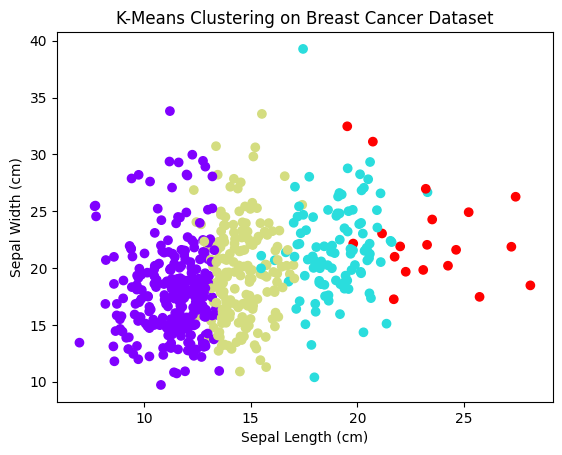

Classification Accuracy: 0.96
Confusion Matrix:
[[38  2]
 [ 2 72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.97      0.97      0.97        74

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# 7.4

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
inputs = datasets.load_breast_cancer()
X = inputs.data
y = inputs.target

# print(X.shape)
# print(y.shape)

# Step 1: Perform K-Means clustering
kmeans = KMeans(n_clusters=4, init=optimal_init)
cluster_assignments = kmeans.fit_predict(X)

print(cluster_assignments)

# Visualize the clustering results (optional)
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='rainbow')
plt.title("K-Means Clustering on Breast Cancer Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

# Step 2: Use cluster assignments as features
X_with_clusters = np.column_stack([X, cluster_assignments])

# print(X_with_clusters)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_clusters, y, test_size=0.2)

# Step 4: Train a Random Forest classifier with extended feature space
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Step 5: Evaluate the classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the results
print(f"Classification Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report_str)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy on original data: 0.9649122807017544
Accuracy on data with cluster labels: 0.956140350877193


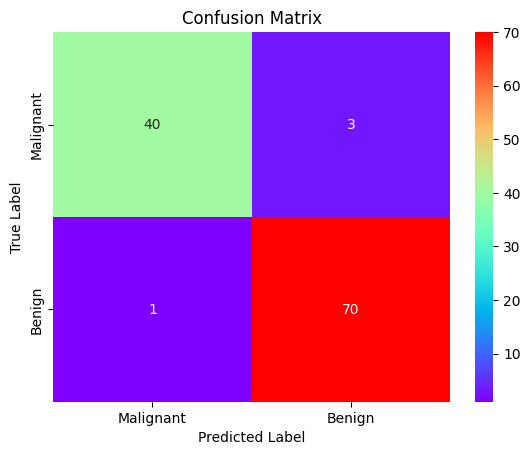

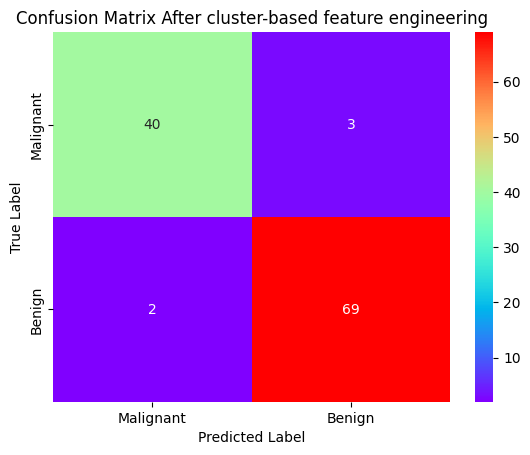

In [ ]:
# 7.5

# Import necessary libraries
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
X_train_clusters = kmeans.fit_predict(X_train_scaled)
X_test_clusters = kmeans.predict(X_test_scaled)

# Add cluster labels as new features
X_train_clustered = np.column_stack((X_train_scaled, X_train_clusters))
X_test_clustered = np.column_stack((X_test_scaled, X_test_clusters))

# Train a Random Forest classifier on the original data
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train_scaled, y_train)
y_pred_original = rf_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Train a Random Forest classifier on the data with cluster labels
rf_clustered = RandomForestClassifier(random_state=42)
rf_clustered.fit(X_train_clustered, y_train)
y_pred_clustered = rf_clustered.predict(X_test_clustered)
accuracy_clustered = accuracy_score(y_test, y_pred_clustered)

# Print accuracy results
print("Accuracy on original data:", accuracy_original)
print("Accuracy on data with cluster labels:", accuracy_clustered)

conf_matrix = confusion_matrix(y_test, y_pred_original)

conf_matrix_clustered = confusion_matrix(y_test, y_pred_clustered)

# Plot the confusion matrix
labels = ["Malignant", "Benign"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="rainbow", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the confusion matrix
labels = ["Malignant", "Benign"]
sns.heatmap(conf_matrix_clustered, annot=True, fmt="d", cmap="rainbow", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix After cluster-based feature engineering")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



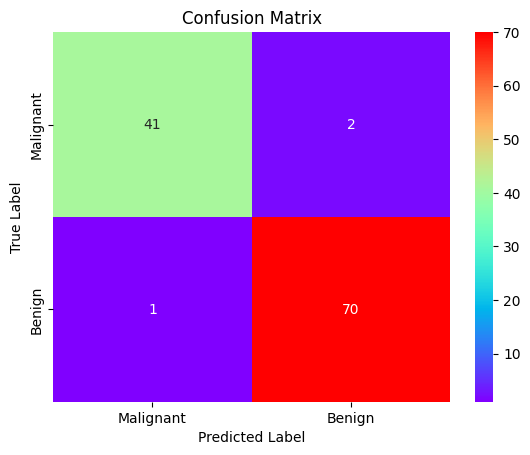

In [ ]:
# 7.6

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use k-means for cluster-based feature engineering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
X_train_clusters = kmeans.fit_predict(X_train_scaled)
X_test_clusters = kmeans.predict(X_test_scaled)

# Concatenate the original features with the cluster labels
X_train_combined = np.column_stack((X_train_scaled, X_train_clusters))
X_test_combined = np.column_stack((X_test_scaled, X_test_clusters))

# Use SVM as a classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_combined, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test_combined)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

# Plot the confusion matrix
labels = ["Malignant", "Benign"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="rainbow", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.fr

Results with DummyClassifier:
Accuracy: 0.62


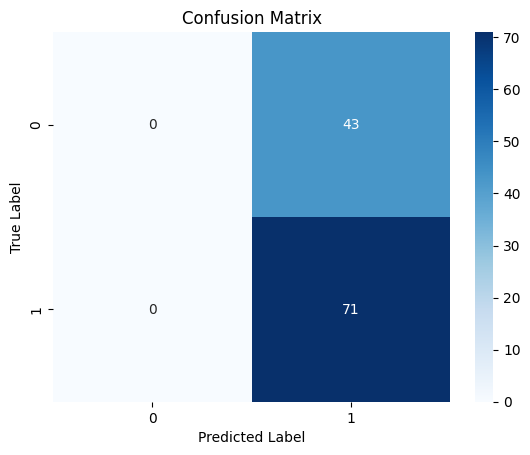

In [ ]:
# 7.7

# With dummy classifier

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Step 1: Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_assignments = kmeans.fit_predict(X)

# Step 2: Combine original features with cluster assignments
X_with_clusters = np.column_stack([X, cluster_assignments])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_clusters, y, test_size=0.2, random_state=42)

# Step 4: Train a DummyClassifier with extended feature space
dummy_classifier = DummyClassifier(strategy='most_frequent')  # You can also use 'uniform' for random predictions
dummy_classifier.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_dummy = dummy_classifier.predict(X_test)

# Step 6: Evaluate the DummyClassifier
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
classification_report_dummy = classification_report(y_test, y_pred_dummy)

# Print results
print("Results with DummyClassifier:")
print(f"Accuracy: {accuracy_dummy:.2f}")
# print("Classification Report:")
# print(classification_report_dummy)

conf_matrix = confusion_matrix(y_test, y_pred_dummy)

# Plot the confusion matrix
labels = ["Malignant", "Benign"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
